In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# ETAPE 1

# définition des parametres : pour tester les fonctions, on prendra n2 = 5

# n = nombre de données d'apprentissage 
# n2 = nombres de neurones dans la 2eme couche
# eta = pas dans la méthode du gradient à pas fixe (= learning rate)
# Niter = nombre d'itérations dans la méthode du gradient à pas fixe

n = 100
n2 = 5
eta = 0.3 #learning rate
Niter = 8000
Nepoch = 6000

In [3]:
# ETAPE 2

# génération des données d'apprentissage

X = np.linspace(0,1,n).reshape(1,n)
y = np.sin(2*np.pi*X)

In [4]:
np.shape(X)
np.shape(y)

(1, 100)

In [5]:
# ETAPE 3

# Fonction d'activation
def sigma(z):
    return 1/(1+np.exp(-z))

# Dérivée de la fonction d'activation
def sigmaprime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [6]:
# ETAPE 4

# Initialisation matrices poids et vecteurs biais du réseau de neurones

W2 = np.random.randn(n2,1)
b2 = np.random.randn(n2,1)

W3 = np.random.randn(1,n2)
b3 = np.random.randn(1)


In [7]:
# ETAPE 5

# Calcul de dC/dW2, dC/dW3, dC/db2 et dC/db3 en utilisant
# la méthode de backpropagation

def compute_grad(x,y,W2,W3,b2,b3):
    a1 = x
    # Calculer et stocker
    z2 = np.dot(W2,a1) + b2
    a2 = sigma(z2)

    z3 = np.dot(W3,a2) + b3
    a3 = z3

    #C = np.mean((a3 - y)**2)*0.5
    # Calcul
    delta3 = (a3-y)
    # Calcul
    delta2 = np.dot(W3.T,delta3)*sigmaprime(z2)
    
    dCdW2 = np.dot(delta2,a1.T)
    #dCdW2 = dCdW2.T
    dCdW3 = np.dot(delta3,a2.T)
    #dCdW3 = dCdW2.T
    dCdb2 = delta2
    dCdb3 = delta3

    return dCdW2, dCdW3, dCdb2, dCdb3

In [8]:
# Test de la fonction compute_grad:
# Pour tester, on prendra les matrices suivantes:

W2 = np.array([[0.1],[0.2],[0.7],[0.9],[0.1]])
b2 = np.array([[0.4],[0.5],[0.3],[0.8],[0.2]])

W3 = np.array([[0.4, 0.6, 0.8, 0.7, 0.2]])
b3 = np.array([[2.5]])

xi = np.array([[0.3]])
yi = np.sin(2*np.pi*xi)

dCdW2, dCdW3, dCdb2, dCdb3 = compute_grad(xi,yi,W2,W3,b2,b3)

# Vous devez trouver les résultats suivants:
print('dCdW2=')
print(dCdW2)
print('')
print('dCdW3=')
print(dCdW3)
print('')
print('dCdb2=')
print(dCdb2)
print('')
print('dCdb3=')
print(dCdb3)

dCdW2=
[[0.09472382]
 [0.13767658]
 [0.18598269]
 [0.13201616]
 [0.04893513]]

dCdW3=
[[2.00282269 2.10390657 2.06540843 2.46139695 1.84208145]]

dCdb2=
[[0.31574606]
 [0.45892193]
 [0.6199423 ]
 [0.44005386]
 [0.1631171 ]]

dCdb3=
[[3.30567707]]


In [9]:
# ETAPE 6

# Définition de la fonction coût

def cost(y,y_pred):
    return (1/2*n)* np.linalg.norm(y-y_pred)

In [10]:
# ETAPE 7

# Prediction du modèle

def model_predict(X,W2,W3,b2,b3):
    a1 = X
    # Calculer et stocker
    z2 = W2@a1 + b2
    a2 = sigma(z2)

    z3 = W3@a2 + b3
    a3 = z3
    
    return a3

In [11]:
# Test de la fonction model_predict

print(model_predict(xi,W2,W3,b2,b3))

[[4.25673358]]


In [12]:
# ETAPE 8

# Programme principal : phase d'apprentissage

Cost = np.zeros(Niter)

for j in range(Niter):
    
    # Votre code ici
        
    dCdW2 = np.zeros(W2.shape)
    dCdW3 = np.zeros(W3.shape)
    dCdb2 = np.zeros(b2.shape)
    dCdb3 = np.zeros(b3.shape)
    
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[j] = cost(y,y_pred)
    for i in range(n):
        
        # Votre code ici
        xi = X[0][i]
        yi = y[0][i]
        gW2, gW3, gb2, gb3 = compute_grad(xi,yi,W2,W3,b2,b3)
        dCdW2 += gW2
        dCdW3 += gW3
        dCdb2 += gb2
        dCdb3 += gb3
        
    
    # Actualisation des paramètres    
    W2 = W2 - (eta/n)*dCdW2
    W3 = W3 - (eta/n)*dCdW3
    b2 = b2 - (eta/n)*dCdb2
    b3 = b3 - (eta/n)*dCdb3

In [13]:
y_pred = model_predict(X,W2,W3,b2,b3)
y_pred

array([[ 0.22196804,  0.25646699,  0.29101187,  0.32556099,  0.36006844,
         0.39448376,  0.42875155,  0.46281106,  0.49659579,  0.53003302,
         0.56304334,  0.59554023,  0.6274295 ,  0.65860885,  0.68896739,
         0.71838515,  0.7467327 ,  0.7738707 ,  0.7996497 ,  0.82390983,
         0.8464808 ,  0.86718191,  0.88582243,  0.90220202,  0.91611164,
         0.9273347 ,  0.93564857,  0.9408267 ,  0.94264106,  0.94086524,
         0.93527811,  0.92566808,  0.91183788,  0.89361002,  0.87083261,
         0.84338565,  0.81118743,  0.77420103,  0.73244049,  0.68597649,
         0.63494111,  0.57953142,  0.5200115 ,  0.45671268,  0.39003169,
         0.32042658,  0.24841048,  0.17454321,  0.09942097,  0.02366453,
        -0.05209361, -0.12722261, -0.20110659, -0.27315727, -0.34282543,
        -0.40961072, -0.47306952, -0.53282064, -0.5885488 , -0.64000588,
        -0.68701026, -0.72944433, -0.76725056, -0.80042648, -0.82901885,
        -0.85311738, -0.87284824, -0.88836766, -0.8

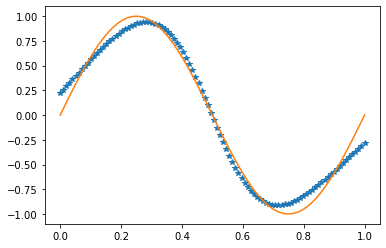

In [14]:
plt.figure()
plt.plot(X[0],y_pred[0], '*', label= "Prediction")
plt.plot(X[0],y[0], label="Verité" )


# Méthode de gradient stochastique

In [15]:
Cost = np.zeros(Nepoch)
for k in range(1,Nepoch):
    dCdW2 = np.zeros(W2.shape)
    dCdW3 = np.zeros(W3.shape)
    dCdb2 = np.zeros(b2.shape)
    dCdb3 = np.zeros(b3.shape)
    (X,y) = shuffle(X,y)
 
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[k] = cost(y,y_pred)     
    for i in range(1,n):
        xi = X[0][i]
        yi = y[0][i]
        gW2, gW3, gb2, gb3 = compute_grad(xi,yi,W2,W3,b2,b3)
        dCdW2 += gW2
        dCdW3 += gW3
        dCdb2 += gb2
        dCdb3 += gb3
   
    W2 = W2 - (eta/n)*dCdW2
    W3 = W3 - (eta/n)*dCdW3
    b2 = b2 - (eta/n)*dCdb2
    b3 = b3 - (eta/n)*dCdb3  
    
    

In [16]:
y_pred = model_predict(X,W2,W3,b2,b3)
y_pred

array([[ 0.20560094,  0.24239367,  0.27915948,  0.31585319,  0.35242536,
         0.38882197,  0.42498406,  0.46084738,  0.49634198,  0.53139184,
         0.56591444,  0.59982037,  0.6330129 ,  0.66538761,  0.69683197,
         0.72722503,  0.75643706,  0.78432933,  0.81075395,  0.83555375,
         0.8585624 ,  0.87960456,  0.89849631,  0.91504579,  0.92905404,
         0.94031623,  0.94862318,  0.95376327,  0.95552474,  0.95369852,
         0.94808145,  0.93847995,  0.92471427,  0.90662305,  0.8840683 ,
         0.85694067,  0.82516484,  0.78870497,  0.7475699 ,  0.70181798,
         0.65156127,  0.59696878,  0.53826866,  0.47574892,  0.40975665,
         0.34069552,  0.26902149,  0.1952368 ,  0.11988234,  0.04352861,
        -0.0332345 , -0.10980859, -0.18559805, -0.26002116, -0.33252077,
        -0.40257392, -0.46970028, -0.53346903, -0.59350405, -0.64948732,
        -0.70116061, -0.74832552, -0.79084201, -0.82862567, -0.86164403,
        -0.88991197, -0.91348671, -0.93246243, -0.9

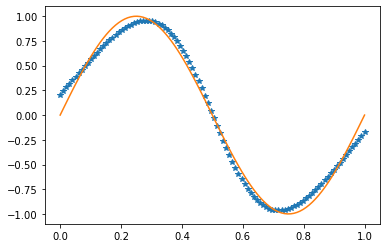

In [17]:
plt.figure()
plt.plot(X[0],y_pred[0], '*', label= "Prediction")
plt.plot(X[0],y[0], label="Verité" )

# Méthode de gradient stochastique avec Mini Lots

In [18]:
Nepoch = 3000
Nbatch = 5
Batchsize = 20

In [19]:
Cost = np.zeros(Nepoch)

for k in range(Nepoch):
    
    # Votre code ici
        
      
    # Mélanger des données
    (X,y) = shuffle(X,y)
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[k] = cost(y,y_pred)
    for j in range(Nbatch):
        dCdW2 = np.zeros(W2.shape)
        dCdW3 = np.zeros(W3.shape)
        dCdb2 = np.zeros(b2.shape)
        dCdb3 = np.zeros(b3.shape)
        for i in range(Batchsize):
            u = j*Batchsize
            # Votre code ici
            xi = X[0][u+i]
            yi = y[0][u+i]
            gW2, gW3, gb2, gb3 = compute_grad(xi,yi,W2,W3,b2,b3)
            dCdW2 += gW2
            dCdW3 += gW3
            dCdb2 += gb2
            dCdb3 += gb3
        
    
        # Actualisation des paramètres    
        W2 = W2 - (eta/Batchsize)*dCdW2
        W3 = W3 - (eta/Batchsize)*dCdW3
        b2 = b2 - (eta/Batchsize)*dCdb2
        b3 = b3 - (eta/Batchsize)*dCdb3

In [20]:
y_pred = model_predict(X,W2,W3,b2,b3)
y_pred

array([[ 0.13071259,  0.17565732,  0.22031024,  0.26460825,  0.30848371,
         0.35186418,  0.39467214,  0.4368248 ,  0.47823381,  0.51880507,
         0.55843848,  0.5970278 ,  0.63446045,  0.67061743,  0.70537323,
         0.73859587,  0.77014694,  0.7998818 ,  0.82764981,  0.85329481,
         0.87665557,  0.89756657,  0.91585882,  0.931361  ,  0.94390072,
         0.95330608,  0.95940742,  0.96203938,  0.96104315,  0.95626907,
         0.94757933,  0.93485104,  0.91797935,  0.89688074,  0.87149642,
         0.84179567,  0.80777904,  0.76948145,  0.72697486,  0.68037058,
         0.62982097,  0.57552049,  0.51770597,  0.456656  ,  0.39268945,
         0.32616291,  0.25746735,  0.18702368,  0.11527765,  0.04269394,
        -0.0302503 , -0.10307223, -0.17529028, -0.24643116, -0.31603648,
        -0.38366906, -0.44891856, -0.51140633, -0.57078952, -0.6267641 ,
        -0.67906701, -0.72747738, -0.77181678, -0.81194865, -0.84777702,
        -0.87924458, -0.90633022, -0.92904617, -0.9

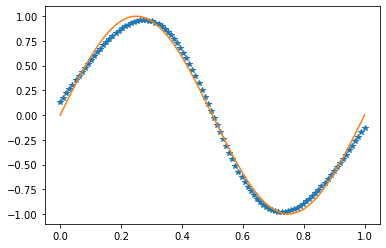

In [21]:
plt.figure()
plt.plot(X[0],y_pred[0], '*', label= "Prediction")
plt.plot(X[0],y[0], label="Verité" )

# Méthode de gradient stochastique avec Mini Lots et moyenne glissant

In [22]:
Cost = np.zeros(Nepoch)

beta = 0.9


dCdW2_avg = np.zeros(W2.shape)
dCdW3_avg = np.zeros(W3.shape)
dCdb2_avg = np.zeros(b2.shape)
dCdb3_avg = np.zeros(b3.shape)
for k in range(Nepoch):
    
    # Votre code ici
    
    # Mélanger des données
    (X,y) = shuffle(X,y)
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[k] = cost(y,y_pred)
    
    for j in range(Nbatch):
        dCdW2 = np.zeros(W2.shape)
        dCdW3 = np.zeros(W3.shape)
        dCdb2 = np.zeros(b2.shape)
        dCdb3 = np.zeros(b3.shape)
        for i in range(Batchsize):
            u = j*Batchsize

            xi = X[0][u+i]
            yi = y[0][u+i]
            
            gW2, gW3, gb2, gb3 = compute_grad(xi,yi,W2,W3,b2,b3)
            
            dCdW2 += gW2
            dCdW3 += gW3
            dCdb2 += gb2
            dCdb3 += gb3
            
            dCdW2_avg = beta*dCdW2_avg + (1-beta)*dCdW2
            dCdW3_avg = beta*dCdW3_avg + (1-beta)*dCdW3
            dCdb2_avg = beta*dCdb2_avg + (1-beta)*dCdb2
            dCdb3_avg = beta*dCdb3_avg + (1-beta)*dCdb3
        
        # Actualisation des paramètres    
        W2 = W2 - (eta/Batchsize)*dCdW2_avg
        W3 = W3 - (eta/Batchsize)*dCdW3_avg
        b2 = b2 - (eta/Batchsize)*dCdb2_avg
        b3 = b3 - (eta/Batchsize)*dCdb3_avg

In [23]:
y_pred = model_predict(X,W2,W3,b2,b3)
y_pred

array([[ 0.062028  ,  0.11584138,  0.16905854,  0.22159835,  0.27337515,
         0.32429858,  0.37427347,  0.42319967,  0.47097194,  0.5174799 ,
         0.56260793,  0.60623522,  0.64823575,  0.68847846,  0.72682738,
         0.7631419 ,  0.79727714,  0.82908438,  0.85841165,  0.88510447,
         0.90900665,  0.92996138,  0.94781235,  0.96240516,  0.97358884,
         0.98121762,  0.98515281,  0.98526494,  0.98143601,  0.97356189,
         0.96155487,  0.94534625,  0.92488894,  0.90016011,  0.87116366,
         0.8379326 ,  0.8005311 ,  0.75905631,  0.71363969,  0.66444792,
         0.61168317,  0.55558282,  0.49641846,  0.43449421,  0.37014434,
         0.30373019,  0.23563643,  0.16626679,  0.09603927,  0.02538101,
        -0.04527711, -0.11550591, -0.18488338, -0.25299989, -0.31946311,
        -0.38390244, -0.445973  , -0.50535885, -0.56177564, -0.61497255,
        -0.66473344, -0.71087746, -0.75325886, -0.79176635, -0.82632185,
        -0.85687888, -0.88342055, -0.90595728, -0.9

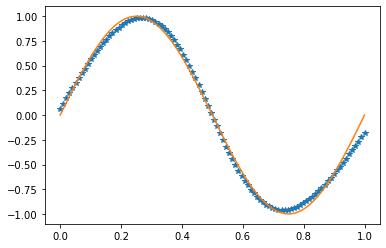

In [24]:
plt.figure()
plt.plot(X[0],y_pred[0], '*', label= "Prediction")
plt.plot(X[0],y[0], label="Verité" )